[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nils-holmberg/socs-qmd/blob/main/jnb/lecture3_nlp3.ipynb)

# chatgpt test (topic modeling)

prompt: show me the python code needed to read an excel file with one column of text data, and perform the necessary preprocessing steps to run sklearn topic modeling using the lda algorithm

In [24]:
# paste chatgpt code here..
















In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if not already available
nltk.download('stopwords')
nltk.download('punkt')

# Load your Excel file
excel_file_path = 'your_excel_file.xlsx'
data = pd.read_excel(excel_file_path)

# Assuming your text data is in a column named 'text_column'
text_data = data['text_column']

# Tokenization and preprocessing
stop_words = set(stopwords.words('english'))  # English stopwords
stop_words = stopwords.words('english')
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words, token_pattern=r'\b\w+\b')
tf = vectorizer.fit_transform(text_data)

# Apply LDA topic modeling
num_topics = 4  # You can adjust the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(tf)

# Print topics and associated words
feature_names = vectorizer.get_feature_names_out()
num_top_words = 10  # You can adjust the number of top words per topic

for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(" ".join(top_words))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Topic 1:
sweden people ice stockholm cold central zoom vehicle goal rights
Topic 2:
ski hammarbybacken skiing stockholm resort slopes lifts siberian huskies sledding
Topic 3:
sweden way sami cultural reindeer traditional activities popular tourism besides
Topic 4:
nature company best europe tours naturensbasta quality national label learn


# text classification (naive bayes)

In [2]:
!gdown https://drive.google.com/uc?id=1EMzJxxoBaN_NbvF7xhoc09K82vQ6H_LX

Downloading...
From: https://drive.google.com/uc?id=1EMzJxxoBaN_NbvF7xhoc09K82vQ6H_LX
To: /content/content.xlsx
100% 50.7k/50.7k [00:00<00:00, 83.8MB/s]


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
fp = "content.xlsx"
df = pd.read_excel(fp, header=0, sheet_name='reviews')
df.head()

,text,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [5]:
import nltk
from nltk.corpus import stopwords

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## define features and outcomes

## split training and test data

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Assuming your Excel columns are named 'text' and 'sentiment'
X = df['text']  # Text data
y = df['sentiment']  # Binary sentiment labels

# Step 2: Perform TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features as needed
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Step 3: Split the dataset into training (750 rows) and testing (250 rows)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)

# Now, X_train and y_train contain the training data and labels (750 rows),
# and X_test and y_test contain the testing data and labels (250 rows).


## train naive bayes classifier

## validate model performance

Accuracy: 0.85
Precision: 0.84
Recall: 0.88
F1-score: 0.86


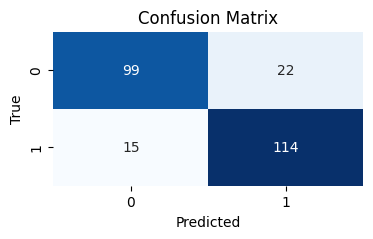

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 4: Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = clf.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Step 7: Create and plot a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


## save classification model

## make inference on new samples

In [10]:
import joblib

# Save the trained model and TF-IDF vectorizer to files
model_filename = 'sentiment_model.pkl'
vectorizer_filename = 'tfidf_vectorizer.pkl'

joblib.dump(clf, model_filename)
joblib.dump(tfidf_vectorizer, vectorizer_filename)


['tfidf_vectorizer.pkl']

In [17]:
# To load the model and vectorizer for inference:
loaded_model = joblib.load(model_filename)
loaded_vectorizer = joblib.load(vectorizer_filename)

# Example: Using the loaded model and vectorizer to predict sentiment for a new sample string
new_sample = "This phone is amazing"
# Vectorize the new sample using the loaded vectorizer
new_sample_tfidf = loaded_vectorizer.transform([new_sample])
# Use the loaded model for prediction
prediction = loaded_model.predict(new_sample_tfidf)

# Convert the prediction to a human-readable label if needed
sentiment_label = "Positive" if prediction == 1 else "Negative"

print(f"Predicted sentiment: {sentiment_label}")


Predicted sentiment: Positive


# spacy language models

In [ ]:
# medium size language model
!python -m spacy download en_core_web_md


In [22]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Define random words
word = "cat"

# Process the words to get their word vectors
token = nlp(word)

# Check if the token has a vector
if token.has_vector:
    # Print the word vector as a NumPy array
    print(f"Vector for '{word}':")
    print(token.vector)
else:
    print(f"No vector available for '{word}'.")


Vector for 'cat':
[-1.3749216  -0.9209707  -0.48585108  0.7449953  -0.04045266  0.40948564
  1.2951561   1.480995    0.48480064 -0.7330386   2.462772   -0.9649264
 -0.37727293  0.08553091 -0.24743515  1.6335745  -0.06138834 -1.5028492
  0.967414    0.63307035 -0.72185993  0.6233178  -1.1602921  -0.6722332
  0.9362452   1.0436772   0.3563193   0.9629261  -0.8357587   0.449831
 -0.6676395  -0.31429762  1.9747405  -0.38430327 -0.44635606 -2.0205777
  0.07270992  1.4437965   0.5954057   0.31014535 -1.2809043  -0.60996306
 -0.6490139   0.72085637 -1.1413931  -1.5718629  -0.5458978   1.5909092
  0.38662726  0.47634625  0.70607305  0.91097486  0.34076473  0.32807004
 -0.34836677  0.07606278  1.0374578   0.24974427  0.21037751 -0.10116711
 -0.97328275 -0.95685375 -0.7718992  -0.6154634  -0.19992816 -0.19895095
 -0.4496122   0.28037518  0.5823548  -1.214601    1.1826286   0.5630324
  0.1241945  -1.0164824   0.14934509 -0.3980039  -0.9265938   0.21561976
  0.39138982 -2.1365113  -0.29684037 -0.2

In [23]:
print(len(token.vector))

96


In [ ]:
# Define two random words
word1 = "cat"
word2 = "tiger"

# Process the words to get their word vectors
token1 = nlp(word1)
token2 = nlp(word2)

# Check if the tokens are valid words (have word vectors)
if token1.has_vector and token2.has_vector:
    # Compute the cosine similarity between the word vectors
    similarity = token1.similarity(token2)
    print(f"Similarity between '{word1}' and '{word2}': {similarity}")
else:
    print("One or both of the words do not have word vectors available in the spaCy model.")
